## Import bibliotek.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns # wizualizacje w Python
from sklearn.linear_model import LinearRegression # regresja liniowa SKLEARN
from sklearn.model_selection import train_test_split # funkcja do podziału zbioru
from sklearn.metrics import mean_squared_error # metryka z której skorzystamy
from statsmodels.formula.api import ols # regresja liniowa / metoda najmniejszych kwadratów STATSMODELS
import matplotlib.pyplot as plt # wizualizacje w Python

## Ćwiczenie 1.
Wczytajamy zbiory dotyczące danych sprzedażowych "Produktu A".

In [2]:
tr = pd.read_parquet('dane/tr.parquet')
va = pd.read_parquet('dane/va.parquet')

#### 1.1. Zbuduj pusty model regresji liniowej, tylko z wyrazem wolnym. Będzie on naszym punktem odniesienia dla kolejnych modeli.

In [3]:
model_0 = ols(formula='sprzedaz ~ 1',
              data=tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(tr)
pred_va = model_0.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                nan
Time:                        15:30:48   Log-Likelihood:            -1.3983e+05
No. Observations:               49680   AIC:                         2.797e+05
Df Residuals:                   49679   BIC:                         2.797e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8678      0.018    213.526      0.0

#### 1.2. Dodaj do modelu najbardziej perspektywiczną zmienną. 

**Zanim zaczniesz, przeczytaj proszę wnioski z poprzednich zajęć, które podsumowałem poniżej.**

---
Dla przypomnienia, wnioski z poprzednich zajęć i analizy zbioru uczącego:
* Najmocniej skorelowana ze zmienną celu: "srednia_sprzedaz_0_13d" - 0.783053
* Ze zmienną "srednia_sprzedaz_0_13d" wysoce skorelowane są zmienne: srednia_sprzedaz_0_2d, srednia_sprzedaz_0_6d
* Zmienne do sprawdzenia:
    * "srednia_cena_ropy_0_6d" - mocniej skorelowana ze zmienną celu niż srednia_cena_ropy_0_29d
    * "rok_dzialalnosci" - z każdym rokiem sprzedaż nieco wzrasta.
    * Pozostałe zmienne oparte na dacie: święta, weekendy, etc.
---

In [4]:
model_1 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d',
              data=tr).fit()
print(model_1.summary())
pred_tr = model_1.predict(tr)
pred_va = model_1.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 7.875e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:30:48   Log-Likelihood:            -1.1623e+05
No. Observations:               49680   AIC:                         2.325e+05
Df Residuals:                   49678   BIC:                         2.325e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

#### 1.3. Spróbuj dodać do modelu kolejną zmienną, która podczas EDA była perspektywiczna.

Zwróć uwagę na współczynniki modelu i p-value. Zdecyduj, czy zmienna powinna zostać  modelu, czy też nie.

In [5]:
model_2 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d + srednia_cena_ropy_0_6d',
              data=tr).fit()
print(model_2.summary())
pred_tr = model_2.predict(tr)
pred_va = model_2.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 3.937e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:30:48   Log-Likelihood:            -1.1623e+05
No. Observations:               49680   AIC:                         2.325e+05
Df Residuals:                   49677   BIC:                         2.325e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

**Komentarz**: nowa zmienna posiada znikomy wpływ na zmienną celu (coef=-0.0005). Dodatkowo p-value jest bardzo wysokie (P>|t|=0.342). Zmienną należy usunąć.

#### 1.4. Ceny ropy nie zadziałały? Spróbujmy zatem dodać do modelu zmienną "swieto". Działa? 
* Zwróć uwagę na współczynnik przy nije stojący. Jak można zinterpretować jego wartość i kierunek oddziaływania na zmienną celu?
* Sprawdź również p-value dla nowej zmienne i dla całego modelu oraz wyniki uzyskane na zbiorach TR i VA, by zdecydować czy nowa zmienna przyniosła korzyści.

In [6]:
model_3 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d + swieto',
              data=tr).fit()
print(model_3.summary())
pred_tr = model_3.predict(tr)
pred_va = model_3.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                 4.468e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:30:48   Log-Likelihood:            -1.1426e+05
No. Observations:               49680   AIC:                         2.285e+05
Df Residuals:                   49677   BIC:                         2.286e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [7]:
model_2.pvalues

Intercept                 2.016335e-09
srednia_sprzedaz_0_13d    0.000000e+00
srednia_cena_ropy_0_6d    3.415418e-01
dtype: float64

**Komentarz**: bardzo dobrym kandydatem wydaje się być zmienna "swieto".
* Po jej dodaniu błąd modelu spadł zarówno dla zbioru uczącego, jak i walidacyjnego:
    * MSE TR: 2.51 &rarr; 2.41
    * MSE VA: 2.53 &rarr; 2.39
* Posiada ona zerowe p-value i wysoką wartość współczynnika (coef=-4.0398).
* Wartość współczynnika i kierunek oddziaływania są zgodne z intuicją (w święta sprzedaż spada prakrycznie do zera - drogerie są zamknięte).

#### 1.5. Dodaj do modelu jedną ze zmiennych: "dzien_tygodni", "weekend".

ps. Jednej z nich nie będziemy mogli dodać. Postaraj się uargumentować czemu.

ps2. Spróbuj dodać obie zmienne do modelu i zobacz co się stanie.

In [8]:
model_4_1 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d + swieto + weekend',
              data=tr).fit()
print(model_4_1.summary())
pred_tr = model_4_1.predict(tr)
pred_va = model_4_1.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                 3.091e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:30:48   Log-Likelihood:            -1.1367e+05
No. Observations:               49680   AIC:                         2.273e+05
Df Residuals:                   49676   BIC:                         2.274e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

**Komentarz**:
* Nieco zmniejszył się błąd.
* Zmienna istotna statystycznie (P>|t| < 0.05).
* Relatywnie wysoka wartość współczynnika (0.8202).
* Kierunek wpływu zmiennej da się uzasadnić - sprzedaż w weekendy wzrasta, co może mieć sens dla niektórych typów produktów. 

In [9]:
model_4_2 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d + swieto + dzien_tygodnia',
              data=tr).fit()
print(model_4_2.summary())
pred_tr = model_4_2.predict(tr)
pred_va = model_4_2.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:30:49   Log-Likelihood:            -1.1363e+05
No. Observations:               49680   AIC:                         2.273e+05
Df Residuals:                   49671   BIC:                         2.274e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**Komentarz**:
* Zmienna posiada wiele poziomów, co nieco zaciemnia interpretację.
* Uzysk z jej dodania jest taki sam, jak ze zmiennej "weekend".
* "Intercept" jest nieistotny statystycznie. Widzimy, że wśród dni tygodnia wyszczególnionych powyżej nie ma czwartku, więc to sprzedaż dla czwartku musi być problematyczna.
* Najwyższe współczynniki ma sobota i niedziela (kolejno: 0.9494 i 0.9810). Oba są do siebie zbliżone, więc spokojnie możemy je połączyć w jeden o nazwie "weekend" :-). Model będzie prostszy, a wiedza zostaje w nim uwzględniona.
* Dodanie obu zmiennych do modelu prowadzi do współliniowości - komunikat: "[2] The smallest eigenvalue is 7.5e-23. This might indicate that there are strong multicollinearity problems or that the design matrix is singular."
    * Współliniowość jest oczywista - przecież na podstawie zmiennej "dzień tygodnia", ze 100% dokładnością jesteśmy w stanie wskazać wartość zmiennej "weekend". 
* Użyjemy zmiennej "weekend".

#### 1.6. Dodaj do modelu zmienną "typ_drogerii".
* Zbadaj efekt oddziaływania na zmienną celu.
* Drogerie którego typu sprzedają najwięcej?

In [10]:
model_6 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d + swieto + weekend + typ_drogerii',
              data=tr).fit()
print(model_6.summary())
pred_tr = model_6.predict(tr)
pred_va = model_6.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 2)))
print('MSE VA: {}'.format(np.round(mse_va, 2)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 1.338e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:30:49   Log-Likelihood:            -1.1351e+05
No. Observations:               49680   AIC:                         2.270e+05
Df Residuals:                   49672   BIC:                         2.271e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

**Komentarz**:
* Nowa zmienna jest istotna statystycznie.
* Najlepiej sprzedają drogerie typu "A". W modelu zostały uwzględniowe w "Intercept", jako punkt odniesienia dla pozostałych typów drogerii. Po współczynnikach pozostałych typów widać, że każdy z nich jest ujemny, a więc sprzedaje gorzej niż "baseline", czyli drogerie typu "A".
* Błąd się nieco zmniejszył, ale nieznacznie. Można podejrzewać, że zbiór został w pewnym stopniu wysycony.

#### 1.7. Utwórz w modelu interakcje.
* Bazuj na zmiennych, które już są w modelu.
* Bez korzystania z wykresów, zastanów się jak połączyć dostępne zmienne. Poeksperymentuj analizując wartości p-values i błędy predykcji.

In [11]:
model_7 = ols(formula='sprzedaz ~ srednia_sprzedaz_0_13d:swieto:weekend + typ_drogerii',
              data=tr).fit()
print(model_7.summary())
pred_tr = model_7.predict(tr)
pred_va = model_7.predict(va)

mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 3)))
print('MSE VA: {}'.format(np.round(mse_va, 3)))

                            OLS Regression Results                            
Dep. Variable:               sprzedaz   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 1.302e+04
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:30:50   Log-Likelihood:            -1.1174e+05
No. Observations:               49680   AIC:                         2.235e+05
Df Residuals:                   49671   BIC:                         2.236e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

**Komentarz**:
* Powyższe połączenie poprawia wynik i zdaje się być istotnym statystycznie.

#### 1.8. Czy sprzedaż może być ujemna?
* Sprawdź predykcje ostatniego modelu.
* Z czego wynikają te wartości. Spróbuj to wyjaśnić na podstawie wiedzy, którą dysponujesz.
* Postaraj się "naprawić" predykcje i sprawdź jak zmienił się wynik modelu.

In [12]:
np.min(pred_tr)

-0.6607139840764372

In [13]:
np.min(pred_va)

-0.6175898543991557

Minimalne predykcje są ujemne. Model regresji liniowej jest modelem parametrycznym, który posiada założenia dotyczące "liniowej relacji między zmiennną celu, a zmienną objasniającą".

By to zrozumieć wyobraź sobie przestrzeń dwuwymiarową. Na osi x znajduje się zmienna objaśniająca, a na y zmienna celu. Jeśli korzystamy z prostego modelu regresji i o ile współczynnik kierunkowy danej zmiennej x jest różny od 0 (a więc istnieje zależność między x i y), to dla pewnych wartości x, linia prosta przetnie oś x, a więc y (predykcje) będą ujemne. Należy o tym pamiętać i uważać na tego typu przypadki.

Rozwiązaniem może być:
1. Użycie innego modleu liniowego (o innych założeniach dotyczących rozkładu).
2. Użycie modelu liniowego, który wspiera "wymuszanie" wartości dodatnich.
3. Ręczne obsłużenie przypadków z ujemną predykcją.

In [14]:
pred_tr = np.where(pred_tr<0, 0, pred_tr)
pred_va = np.where(pred_va<0, 0, pred_va)
mse_tr = mean_squared_error(tr.sprzedaz, pred_tr, squared=False)
mse_va = mean_squared_error(va.sprzedaz, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 3)))
print('MSE VA: {}'.format(np.round(mse_va, 3)))

MSE TR: 2.294
MSE VA: 2.298


In [15]:
np.min(pred_tr)

0.0

In [16]:
np.min(pred_va)

0.0

## Ćwiczenie 2.
Twoim celem będzie wyjaśnienie/zamodelowanie zmiennej celu - "salary_in_usd".

Wczytaj dane o zarobkach w branży Data Science.

In [17]:
zarobki_ds = pd.read_csv('dane/data_science_salaries.csv') # płace w Data Science
zarobki_ds = zarobki_ds[zarobki_ds.salary_in_usd < 300000]

#### 2.1. Korzystając z funkcji `train_test_split` podziel zbiór na 3 części: zarobki_tr, zarobki_va, zarobki_te (proporcje 2:1:1, `random_state`=2001).

In [18]:
zarobki_tr, zarobki_va = train_test_split(zarobki_ds, train_size=0.5, random_state=2001)
zarobki_va, zarobki_te = train_test_split(zarobki_va, train_size=0.5, random_state=2001)

In [19]:
zarobki_tr.shape

(2904, 11)

In [20]:
zarobki_va.shape

(1452, 11)

In [21]:
zarobki_te.shape

(1453, 11)

#### 2.2. Zbuduj model bazowy, tzw. "baseline". Niech zawiera on jedynie "Intercept".

Kilka uwag:
* Weryfikuj wyniki modelu za pomocą zbiorów: zarobki_tr i zarobki_va. Zbiór zarobki_te zostaw na finalną weryfikację jakości modelu.
* Sprawdzaj jakość predykcji za pomocą metryki `mean_squared_error` z parametrem `squared=False`.

In [22]:
model_0 = ols(formula='salary_in_usd ~ 1',
              data=zarobki_tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(zarobki_tr)
pred_va = model_0.predict(zarobki_va)

mse_tr = mean_squared_error(zarobki_tr.salary_in_usd, pred_tr, squared=False)
mse_va = mean_squared_error(zarobki_va.salary_in_usd, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 3)))
print('MSE VA: {}'.format(np.round(mse_va, 3)))

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                nan
Time:                        15:30:51   Log-Likelihood:                -36019.
No. Observations:                2904   AIC:                         7.204e+04
Df Residuals:                    2903   BIC:                         7.205e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.438e+05   1093.900    131.496      0.0

#### 2.3. Iteracyjnie rozwijaj model. 
* Zwróć uwagę, że zbiór zawiera (poza zmienną celu) same zmienne kategoryczne.
    * Użyć 2-4 najmocniejszych zmiennych.
    * Ogranicz skomplikowanie modeli - nie dopuść, by model zawierał więcej niż 10 poziomów zmiennych.
* Gdy będziesz mieć pewność, że masz model odpowiedniej jakości, sprawdź go na zbiorze zarobki_te.

In [23]:
zarobki_tr.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [24]:
zarobki_tr = zarobki_tr.copy()
zarobki_va = zarobki_va.copy()
zarobki_te = zarobki_te.copy()
# zmienna "remote_ratio" jest zmienną niemonotoniczną, a więc zarobki nie wzrastają,
    # ani nie maleją wraz ze wzrostem, 
    # albo spadkiem wartości tej zmiennej. 
    # Lepiej zatem ją przedstawić, jako zmienną kategoryczną.
zarobki_tr['remote_ratio'] = zarobki_tr['remote_ratio'].astype('str')
zarobki_va['remote_ratio'] = zarobki_va['remote_ratio'].astype('str')
zarobki_te['remote_ratio'] = zarobki_te['remote_ratio'].astype('str')

In [25]:
model_1 = ols(formula='salary_in_usd ~ experience_level + remote_ratio',
              data=zarobki_tr).fit()
print(model_1.summary())
pred_tr = model_1.predict(zarobki_tr)
pred_va = model_1.predict(zarobki_va)

mse_tr = mean_squared_error(zarobki_tr.salary_in_usd, pred_tr, squared=False)
mse_va = mean_squared_error(zarobki_va.salary_in_usd, pred_va, squared=False)

print('MSE TR: {}'.format(np.round(mse_tr, 3)))
print('MSE VA: {}'.format(np.round(mse_va, 3)))

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     140.1
Date:                Tue, 25 Jul 2023   Prob (F-statistic):          2.08e-133
Time:                        15:30:51   Log-Likelihood:                -35705.
No. Observations:                2904   AIC:                         7.142e+04
Df Residuals:                    2898   BIC:                         7.146e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9.50

**Finalny test.**

In [26]:
pred_te = model_1.predict(zarobki_te)
mse_te = mean_squared_error(zarobki_te.salary_in_usd, pred_te, squared=False)
print('MSE TE: {}'.format(np.round(mse_te, 3)))

MSE TE: 52080.646


Otrzymany wynik jest niegorszy niż te uzyskane na zbiorach: uczącym i walidacyjnym. Można zatem stwierdzić, że model jest wiarygodny, nieprzeuczony i rzetelnie oddaje relacje pomiędzy zmiennymi objasniającymi, a zmienną celu.

## Ćwiczenie 3.

Zamodeluj relację pomiędzy ceną nieruchomości, a zmiennymi objaśniającymi, zawartymi w pliku "house_canada.csv". Plik znajduje się w katalogu "dane".

Opis zbioru:
>The files housing contain 546 observations on sales prices of houses
sold during July, August and September, 1987, in the city of Windsor,
Canada. The following variables are available:

Opis zmiennych:
* price:    sale price of a house
* lotsize:  the lot size of a property in square feet
* bedrooms: number of bedrooms
* bathrms:  number of full bathrooms
* stories:  number of stories excluding basement
* driveway: dummy, 1 if the house has a driveway
* recroom:  dummy, 1 if the house has a recreational room
* fullbase: dummy, 1 if the house has a full finished basement
* gashw:    dummy, 1 if the house uses gas for hot water heating
* airco:    dummy, 1 if there is central air conditioning
* garagepl: number of garage places
* prefarea: dummy, 1 if located in the preferred neighbourhood of the city

In [27]:
house = pd.read_csv('dane/house_canada.csv')

In [28]:
house.shape

(546, 12)

#### 3.1. Podziel zbiór na dwie części - house_tr, house_te.
Zbiór jest niewielki, więc podziel go na 2 części w proporcji 2:1. Użyć zirna `random_state=2001`. Zbiór testowy zostaw na filnalny test i nie używaj go ani do EDA, ani weryfikacji jakości modelu.

In [29]:
house_tr, house_te = train_test_split(house, train_size=0.66, random_state=2001)
house_tr = house_tr.copy()
house_te = house_te.copy()

#### 3.2. Sprawdź rozkład zmiennej celu.
* Zdecyduj, czy warto zmienić rozkład z pomocą logarytmowania?

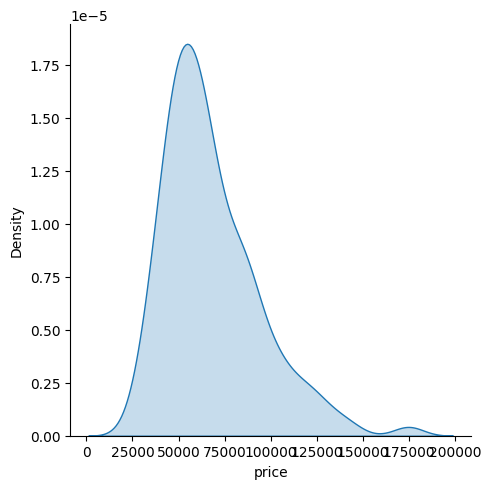

In [30]:
sns.displot(house_tr, x='price', kind='kde', fill=True)
plt.show()

In [31]:
house_tr['price_log10'] = np.log10(house_tr.price)
house_te['price_log10'] = np.log10(house_te.price)

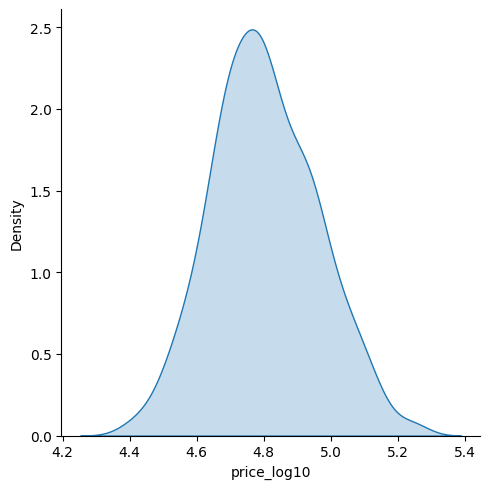

In [33]:
sns.displot(house_tr, x='price_log10', kind='kde', fill=True)
plt.show()

Warto spróbowac skorzystać ze zmiennej transfrmowanej z użyciem logarytmu.

#### 3.3. Sprawdź rozkład drugiej zmiennej  ciągłej - "lotsize".
* Zdecyduj, czy warto zmienić rozkład z pomocą logarytmowania?

In [34]:
house_tr['lotsize_log10'] = np.log10(house_tr.lotsize)
house_te['lotsize_log10'] = np.log10(house_te.lotsize)

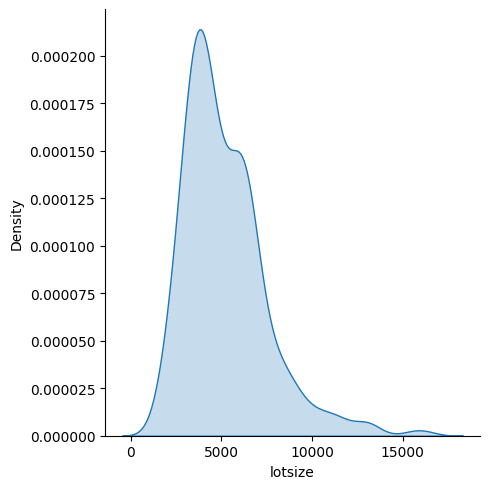

In [35]:
sns.displot(house_tr, x='lotsize', kind='kde', fill=True)
plt.show()

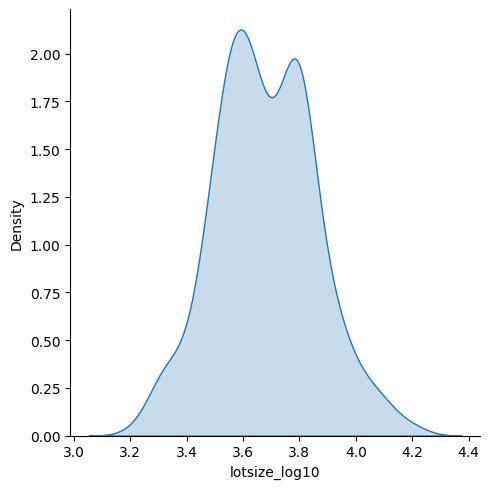

In [36]:
sns.displot(house_tr, x='lotsize_log10', kind='kde', fill=True)
plt.show()

Ponownie, warto spróbowac skorzystać ze zmiennej transfrmowanej z użyciem logarytmu.

#### 3.4. Zbuduj model "baseline", by mieć punkt odniesienia do kolejnych modeli. Zmierz wynik z użyciem `mean_squared_error`.

In [37]:
model_0 = ols(formula='price ~ 1',
              data=house_tr).fit()
print(model_0.summary())
pred_tr = model_0.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 25 Jul 2023   Prob (F-statistic):                nan
Time:                        15:31:24   Log-Likelihood:                -4169.6
No. Observations:                 360   AIC:                             8341.
Df Residuals:                     359   BIC:                             8345.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.784e+04   1368.669     49.567      0.0

#### 3.5. Na zbiorze uczącym sprawdź dopasowanie modelu z użyciem zmiennej "lotsize" w dwóch wariantach (z i bez logarytmowania) i zmiennej celu "price", również w dwóch wariantach.
* Porównaj wyniki osiągane na zbiorze uczącym (korzystając z MSE) i zdecyduj, na którym połączeniu powyższych zmiennych będziesz dalej modelować.

In [38]:
model_1_1 = ols(formula='price ~ lotsize',
              data=house_tr).fit()
print(model_1_1.summary())
pred_tr = model_1_1.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     148.2
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           9.02e-29
Time:                        15:31:24   Log-Likelihood:                -4107.2
No. Observations:                 360   AIC:                             8218.
Df Residuals:                     358   BIC:                             8226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.591e+04   2864.812     12.534      0.0

Ostrzeżenie o współliniowości, lub innym błędzie numerycznym.

In [39]:
model_1_2 = ols(formula='price_log10 ~ lotsize',
              data=house_tr).fit()
print(model_1_2.summary())
pred_tr = model_1_2.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, np.power(10, pred_tr), squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:            price_log10   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     150.1
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           4.71e-29
Time:                        15:31:24   Log-Likelihood:                 219.79
No. Observations:                 360   AIC:                            -435.6
Df Residuals:                     358   BIC:                            -427.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6091      0.017    267.007      0.0

Ponownie, pojawiło się ostrzeżenie o współliniowości, lub innym błędzie numerycznym.

In [40]:
model_1_3 = ols(formula='price ~ lotsize_log10',
              data=house_tr).fit()
print(model_1_3.summary())
pred_tr = model_1_3.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     166.0
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.81e-31
Time:                        15:31:24   Log-Likelihood:                -4101.0
No. Observations:                 360   AIC:                             8206.
Df Residuals:                     358   BIC:                             8214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.342e+05   2.35e+04     -9.978

In [41]:
model_1_4 = ols(formula='price_log10 ~ lotsize_log10',
              data=house_tr).fit()
print(model_1_4.summary())
pred_tr = model_1_4.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, np.power(10, pred_tr), squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:            price_log10   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.48e-33
Time:                        15:31:24   Log-Likelihood:                 230.16
No. Observations:                 360   AIC:                            -456.3
Df Residuals:                     358   BIC:                            -448.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9284      0.140     20.947

Najlepszy wynik, dał model 1_3, który dodatkowo nie zawierał błędu o współliniowości. Zostańmy przy nim. 

#### 3.6. Zbuduj macierz korelacji i zdecyduj, które zmienne dodać do modelu jako pierwsze.

In [42]:
house_tr.select_dtypes('number').corr()

,price,lotsize,bedrooms,bathrms,stories,garagepl,price_log10,lotsize_log10
price,1.000000,0.541122,0.378152,0.510102,0.451430,0.390008,0.971555,0.562838
lotsize,0.541122,1.000000,0.188963,0.206542,0.087757,0.333536,0.543466,0.959432
bedrooms,0.378152,0.188963,1.000000,0.384361,0.381994,0.143359,0.384384,0.179250
bathrms,0.510102,0.206542,0.384361,1.000000,0.361339,0.160395,0.475319,0.209289
stories,0.451430,0.087757,0.381994,0.361339,1.000000,0.057467,0.435493,0.114772
garagepl,0.390008,0.333536,0.143359,0.160395,0.057467,1.000000,0.371873,0.350305
price_log10,0.971555,0.543466,0.384384,0.475319,0.435493,0.371873,1.000000,0.578598
lotsize_log10,0.562838,0.959432,0.179250,0.209289,0.114772,0.350305,0.578598,1.000000


Na podstawie powyższej macierzy korelacji, można wybrac następujące zmienne, które nie są ze sobą wysoce skorelowane (wszystkie poniżej 0.5), a są wysoce skorelowane ze zmienną celu.

In [43]:
model_2 = ols(formula='price ~ lotsize_log10 + bathrms + stories + garagepl',
              data=house_tr).fit()
print(model_2.summary())
pred_tr = model_2.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.43e-65
Time:                        15:31:24   Log-Likelihood:                -4014.0
No. Observations:                 360   AIC:                             8038.
Df Residuals:                     355   BIC:                             8057.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.883e+05   1.95e+04     -9.645

#### 3.7. Uzupełnij model o najlepsze zmienne kategoryczne. 
* Spróbuj dodawać różne zmienne kategoryczne i obserwuj podsumowanie modelu (p-values, ostrzeżenia o współliniowości i błąd predykcji - MSE).

In [44]:
house_tr.dtypes

price            float64
lotsize            int64
bedrooms           int64
bathrms            int64
stories            int64
driveway          object
recroom           object
fullbase          object
gashw             object
airco             object
garagepl           int64
prefarea          object
price_log10      float64
lotsize_log10    float64
dtype: object

In [45]:
# Dodanie do model_2 dodatkowej zmiennej:
    # MSE TR: 16622.137 - recroom
    # nieistotny statystycznie - driveway
    # MSE TR: 16217.836 - fullbase
    # nieistotny statystycznie - gashw
    # MSE TR: 16165.917 - airco
    # MSE TR: 16044.236 - prefarea
model_3 = ols(formula='price ~ lotsize_log10 + bathrms + stories + garagepl + prefarea',
              data=house_tr).fit()
print(model_3.summary())
pred_tr = model_3.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     114.2
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.33e-71
Time:                        15:31:25   Log-Likelihood:                -3996.7
No. Observations:                 360   AIC:                             8005.
Df Residuals:                     354   BIC:                             8029.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.733e+05   1.88e+04     

In [46]:
# Dodanie do model_3 dodatkowej zmiennej:
    # MSE TR: 15935.806 - recroom
    # nieistotny statystycznie - driveway
    # MSE TR: 15721.476 - fullbase
    # MSE TR: 15909.303 - gashw
    # MSE TR: 15383.119 - airco
model_4 = ols(formula='price ~ lotsize_log10 + bathrms + stories + garagepl + prefarea + airco',
              data=house_tr).fit()
print(model_4.summary())
pred_tr = model_4.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     108.4
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           5.82e-77
Time:                        15:31:25   Log-Likelihood:                -3981.6
No. Observations:                 360   AIC:                             7977.
Df Residuals:                     353   BIC:                             8004.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.553e+05   1.83e+04     

In [47]:
# Dodanie do model_4 dodatkowej zmiennej:
    # nieistotny statystycznie - recroom
    # MSE TR: 15357.887 - driveway
    # MSE TR: 15135.546 - fullbase
    # MSE TR: 15155.511 - gashw
model_5 = ols(formula='price ~ lotsize_log10 + bathrms + stories + garagepl + prefarea + airco + fullbase',
              data=house_tr).fit()
print(model_5.summary())
pred_tr = model_5.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     97.33
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.19e-78
Time:                        15:31:25   Log-Likelihood:                -3975.7
No. Observations:                 360   AIC:                             7967.
Df Residuals:                     352   BIC:                             7999.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.586e+05   1.81e+04     

In [48]:
# Dodanie do model_5 dodatkowej zmiennej:
    # nieitnotna statystycznie - recroom
    # nieistotna statystycznie - driveway
    # MSE TR: 14910.48 - gashw
model_6 = ols(formula='price ~ lotsize_log10 + bathrms + stories + garagepl + prefarea + airco + fullbase + gashw',
              data=house_tr).fit()
print(model_6.summary())
pred_tr = model_6.predict(house_tr)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     88.84
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.22e-79
Time:                        15:31:25   Log-Likelihood:                -3970.4
No. Observations:                 360   AIC:                             7959.
Df Residuals:                     351   BIC:                             7994.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.612e+05   1.79e+04     

#### 3.8. Sprawdź, czy występuje interakcja pomiędzy którąś z nich (zmiennych kategorycznych), już wybraną zmienną numeryczną i zmienną celu. 

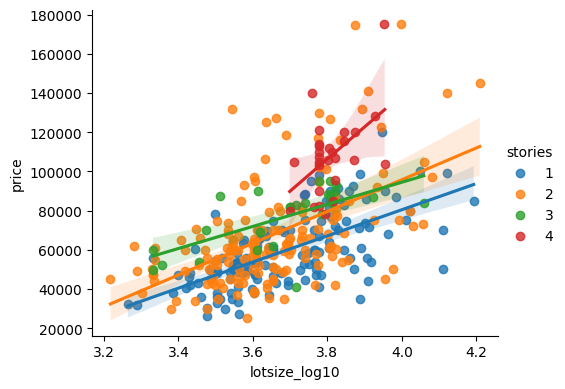

In [49]:
sns.lmplot(data=house_tr, x='lotsize_log10', y='price', hue='stories', aspect=1.3, height=4)
plt.show()

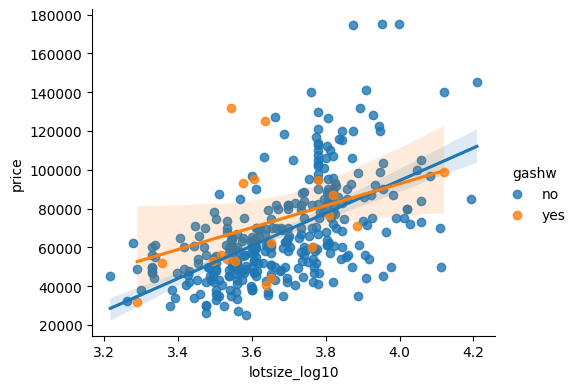

In [50]:
sns.lmplot(data=house_tr, x='lotsize_log10', y='price', hue='gashw', aspect=1.3, height=4)
plt.show()

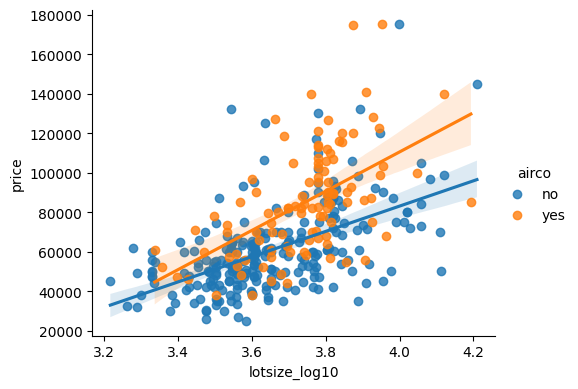

In [51]:
sns.lmplot(data=house_tr, x='lotsize_log10', y='price', hue='airco', aspect=1.3, height=4)
plt.show()

#### 3.9. Zbuduj finany model i sprawdź jego jakość. 

In [52]:
model_7 = ols(formula='price ~ lotsize_log10:airco + bathrms + stories + garagepl + prefarea + fullbase + gashw',
              data=house_tr).fit()
print(model_7.summary())
pred_tr = model_7.predict(house_tr)
pred_te = model_7.predict(house_te)
mse_tr = mean_squared_error(house_tr.price, pred_tr, squared=False)
mse_te = mean_squared_error(house_te.price, pred_te, squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))
print('MSE TE: {}'.format(np.round(mse_te, 3)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     89.06
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           9.21e-80
Time:                        15:31:28   Log-Likelihood:                -3970.1
No. Observations:                 360   AIC:                             7958.
Df Residuals:                     351   BIC:                             7993.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Możemy jeszcze sprawdzić, jak by performował model oparty na logarytmowanej zmiennej celu.

In [53]:
model_8 = ols(formula='price_log10 ~ lotsize_log10:airco + bathrms + stories + garagepl + prefarea + fullbase + gashw',
              data=house_tr).fit()
print(model_8.summary())
pred_tr = model_8.predict(house_tr)
pred_te = model_8.predict(house_te)
mse_tr = mean_squared_error(house_tr.price, np.power(10, pred_tr), squared=False)
mse_te = mean_squared_error(house_te.price, np.power(10, pred_te), squared=False)
print('MSE TR: {}'.format(np.round(mse_tr, 3)))
print('MSE TE: {}'.format(np.round(mse_te, 3)))

                            OLS Regression Results                            
Dep. Variable:            price_log10   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     87.24
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.01e-78
Time:                        15:31:28   Log-Likelihood:                 353.83
No. Observations:                 360   AIC:                            -689.7
Df Residuals:                     351   BIC:                            -654.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

Jeśli wziąć pod uwagę MSE, to jest on nieco lepszy. Nieco spadł "Adj. R-squared", choć nieznacznie (z 0.662 na 0.658). Czy zdecydowałbym się na ten model? Chyba nie. Uzysk nie jest ogromny, a łatwość interpretacji zmiennej celu, która jest w swojej "naturalnej" skali jest w mojej ocenie ważniejsza.